In [1]:
import numpy as np
from tqdm import tqdm
import cvxpy as cp
import matplotlib.pyplot as plt
import time

from src.mpc import Controller, Dimension
import src.terminal_set as terminal_set
from src.visualise import (
    plot_action_history,
    plot_state_history,
)
from main_path_following import simulate_path_following

In [15]:
dt = 0.10  # Sampling period
T = 50  # Duration of simulation
dim = Dimension(nx=12, nu=4, ny=3, nd=3)

# Controller
ctrl1 = Controller(
    dim=dim,
    mpc_horizon=5,
    timestep_mpc_stages=dt,
)

ctrl2 = Controller(
    dim=dim,
    mpc_horizon=6,
    timestep_mpc_stages=dt,
)

ctrl3 = Controller(
    dim=dim,
    mpc_horizon=7,
    timestep_mpc_stages=dt,
)

# Beta comparison
ctrl4 = Controller(
    dim=dim,
    mpc_horizon=5,
    timestep_mpc_stages=dt,
)
ctrl4.beta = 4.0


# Set disturbance and terminal cost scaling
# ctrl.d = np.array([0.0, 0.5, 0.0])
# ctrl.beta = 2.0  # << (very small) beta means you get a behaviour as if tcost was not there at all

subsample_step = 4
lissajous = np.load("trajectories/lissajous.npy")
lissajous_subsampled = lissajous[:, ::subsample_step]
print(
    "Subsampled trajectory from ",
    lissajous.shape,
    " to ",
    lissajous_subsampled.shape,
)

Subsampled trajectory from  (3, 375)  to  (3, 94)


In [4]:
start = time.time()
outputs1, states1, inputs1 = simulate_path_following(ctrl1, lissajous_subsampled,T)
end = time.time()
print(
    "Simulation of {} with horizon {}, took {}s.".format(
        ctrl1.control_type,
        ctrl1.N,
        end - start,
    )
)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-18


Simulating: 100%|██████████| 50/50 [00:00<00:00, 108.68it/s]

Simulation of mpc with horizon 20, took 47.35618185997009s.


In [10]:
start = time.time()
outputs2, states2, inputs2 = simulate_path_following(ctrl2, lissajous_subsampled,T)
end = time.time()
print(
    "Simulation of {} with horizon {}, took {}s.".format(
        ctrl2.control_type,
        ctrl2.N,
        end - start,
    )
)

Simulating: 100%|██████████| 50/50 [00:00<00:00, 88.89it/s]

Simulation of mpc with horizon 6, took 56.30644702911377s.


In [11]:
start = time.time()
outputs3, states3, inputs3 = simulate_path_following(ctrl3, lissajous_subsampled,T)
end = time.time()
print(
    "Simulation of {} with horizon {}, took {}s.".format(
        ctrl1.control_type,
        ctrl3.N,
        end - start,
    )
)

Simulating: 100%|██████████| 50/50 [00:00<00:00, 87.37it/s]

Simulation of mpc with horizon 7, took 58.61211013793945s.


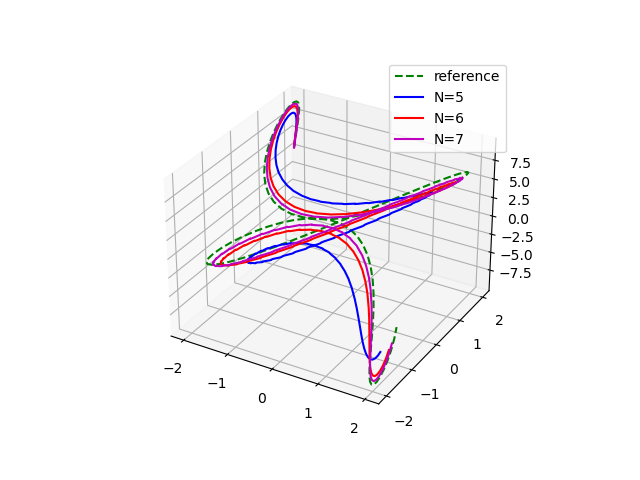

In [12]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.plot(
    lissajous_subsampled[0, :],
    lissajous_subsampled[1, :],
    lissajous_subsampled[2, :],
    label="reference",
    color="g",
    linestyle="--",
)
ax.plot(
    outputs1[0, :],
    outputs1[1, :],
    outputs1[2, :],
    label="N=" + str(ctrl1.N),
    color="b",
    linestyle="-",
)
ax.plot(
    outputs2[0, :],
    outputs2[1, :],
    outputs2[2, :],
    label="N=" + str(ctrl2.N),
    color="r",
    linestyle="-",
)
ax.plot(
    outputs3[0, :],
    outputs3[1, :],
    outputs3[2, :],
    label="N=" + str(ctrl3.N),
    color="m",
    linestyle="-",
)
ax.legend()

In [16]:
start = time.time()
outputs4, states4, inputs4 = simulate_path_following(ctrl4, lissajous_subsampled,T)
end = time.time()
print(
    "Simulation of {} with horizon {}, took {}s.".format(
        ctrl1.control_type,
        ctrl4.N,
        end - start,
    )
)

Simulating: 100%|██████████| 50/50 [00:00<00:00, 63.34it/s]

Simulation of mpc with horizon 5, took 56.06315302848816s.


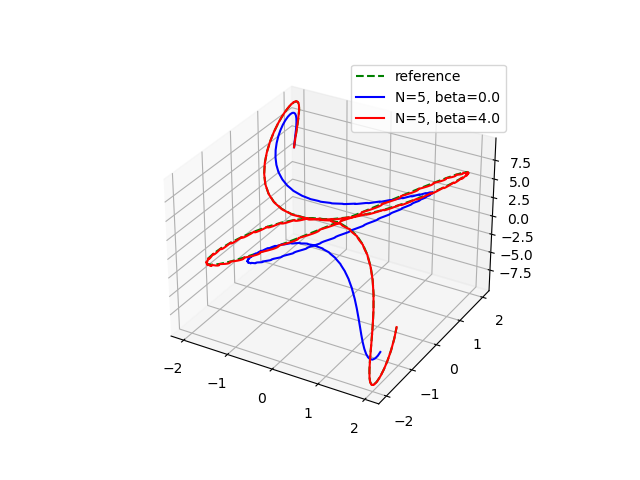

In [18]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.plot(
    lissajous_subsampled[0, :],
    lissajous_subsampled[1, :],
    lissajous_subsampled[2, :],
    label="reference",
    color="g",
    linestyle="--",
)
ax.plot(
    outputs1[0, :],
    outputs1[1, :],
    outputs1[2, :],
    label="N=" + str(ctrl1.N) + ", beta=" + str(ctrl1.beta),
    color="b",
    linestyle="-",
)
ax.plot(
    outputs4[0, :],
    outputs4[1, :],
    outputs4[2, :],
    label="N=" + str(ctrl4.N) + ", beta=" + str(ctrl4.beta),
    color="r",
    linestyle="-",
)
ax.legend()